In [9]:
N = ord("Y") % 3 + 1
N

3

Добові втрати БТР:
[190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23  30
  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16  25
  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22  24
  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27  28
  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19  22
  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18   8
  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6  10
   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7   6
  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6  19
   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8   5
   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9  33
  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8  20
  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14  12
  14  16  20   3   8  18  11  26

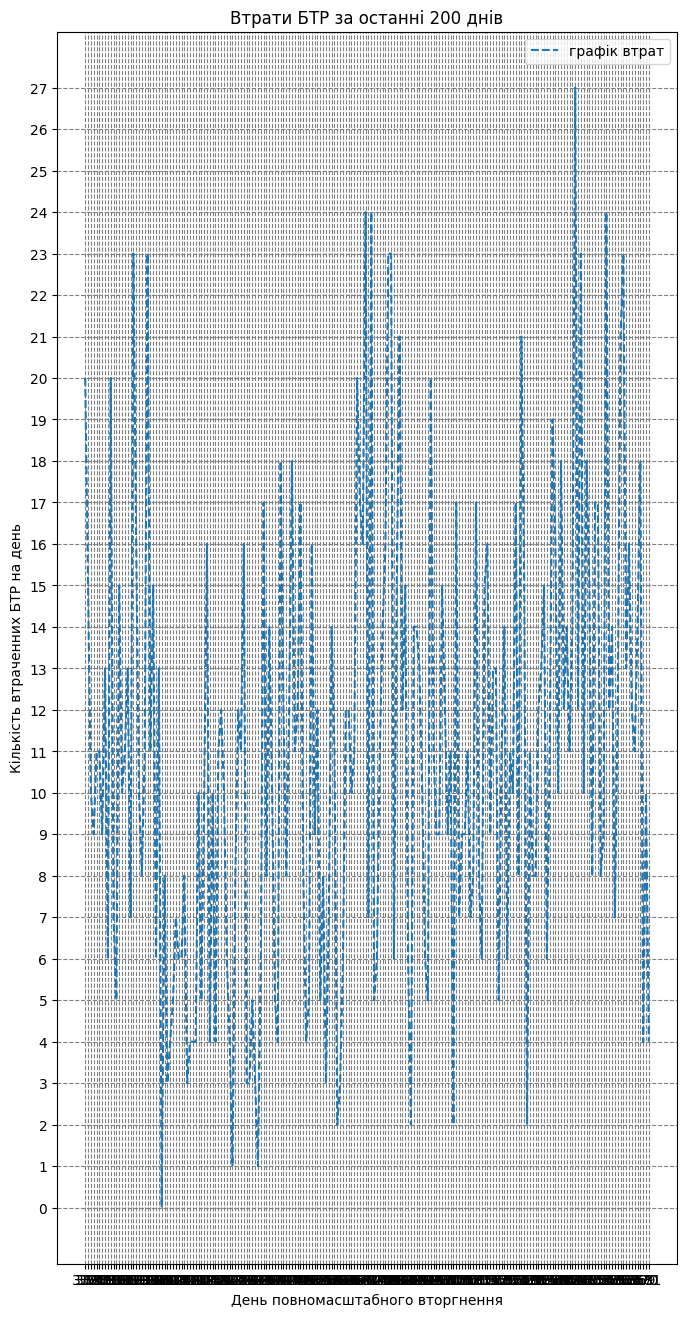

In [2]:
# Лабораторна робота 1

# Дослідження та візуалізація даних за допомогою Python
# Мета: отримати базові навики використання Python для дослідження та візуалізації даних

# Варіант 3. Дослідження втрат бронетранспортерів (БТР).
# Завдання:
# 1. Створіть функцію, яка приймає назву файлу та назву стовпця як
# параметр та повертає масив numpy зі значеннями стовпця.
# 2. Використовуючи функцію з попереднього завдання, створіть масив
# numpy зі значень стовпця «APC» (Armored personnel carrier).
# 3. Знайдіть добові втрати БТР.
# 4. Знайдіть 5 найбільших добових втрат БТР.
# 5. Визначте, скільки БТР було знищено влітку 2023 року.
# 6. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
# 7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої
# дати в наборі даних)

# Савінков Євген, КН-221а

import matplotlib.pyplot as plt
import numpy as np
import csv

FILENAME = 'russia_losses_equipment.csv'
DATES = 'date'
DAYS = 'day'
BTR = 'APC'

def get_column_data(file_name, column_name):
    try:
        with open(file_name, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
        
            header = next(csv_reader)
            
            try:
                column_index = header.index(column_name)
            except:
                raise Exception(f'Column \'{column_name}\' doesn\'t exist!')
            else:
                data = []
                for row in csv_reader:
                    data.append(row[column_index])
                return np.array(data)
    except FileNotFoundError:
        raise Exception(f'File \'{file_name}\' doesn\'t exist!')

def get_daily_losses():
    try:
        z_losses = get_column_data(FILENAME, BTR)
        z_losses = np.array(z_losses, dtype='int')
        return np.diff(z_losses)
    except Exception as e:
        raise Exception(f'{e}')

def get_max_losses(days):
    try:
        z_losses = get_daily_losses()
        
        if days < 0 or days >= len(z_losses):

            raise Exception(f'Invalid number of days - \'{days}\'')
            
        return np.sort(z_losses)[::-1][:days]
    except Exception as e:
        raise Exception(f'{e}')

def get_sum_of_losses_by_date(start, end):
    try:
        dates = get_column_data(FILENAME, DATES)
        z_losses = get_daily_losses()
        
        date_start_indices = np.where(dates == start)[0]
        date_end_indices = np.where(dates == end)[0]

        if not date_start_indices or not date_end_indices:
            raise Exception('Start or end date not found')

        date_start_index = date_start_indices[0]
        date_end_index = date_end_indices[-1] + 1

        if date_start_index >= date_end_index:
            raise Exception('Start date can\'t be later than end date or the same')

        return np.sum(z_losses[date_start_index:date_end_index])
    except Exception as e:
        raise Exception(f'{e}')

def get_mean_of_losses_by_day(start, end):
    try:
        days = get_column_data(FILENAME, DAYS)
        z_losses = get_daily_losses()
        
        day_start_indices = np.where(days == start)[0]
        day_end_indices = np.where(days == end)[0]

        if not day_start_indices or not day_end_indices:
            raise Exception('Start or end day not found')

        day_start_index = day_start_indices[0]
        day_end_index = day_end_indices[-1] + 1

        if day_start_index >= day_end_index:
            raise Exception('Start date can\'t be later than end date or the same')

        return round(np.mean(z_losses[day_start_index:day_end_index]))
    except Exception as e:
        raise Exception(f'{e}')

def draw_graph(last_days):
    x_days = get_column_data(FILENAME, DAYS)
    y_losses = get_daily_losses()
    
    if len(x_days) < last_days or len(y_losses) < last_days:
        raise Exception("Too many days requested, not enough data")
    
    # Вибір останніх last_days днів
    x = x_days[-last_days:]
    y = y_losses[-last_days:]
    
    # Створення графіка
    plt.figure(figsize=(8, 16), dpi=100)  # Розмір та роздільна здатність
    
    # Додавання лінійного графіку з пунктирними лініями, підписами та назвою
    plt.plot(x, y, linestyle='--', label='графік втрат')
    
    # Додавання легенди
    plt.legend()
    
    # Додавання сітки та встановлення кольору та типу ліній сітки
    plt.grid(True, linestyle='--', color='gray')
    
    plt.title(f'Втрати БТР за останні {last_days} днів')
    plt.xlabel('День повномасштабного вторгнення')
    plt.ylabel('Кількість втраченних БТР на день')

    plt.yticks(range(int(min(y)), int(max(y)) + 1))

    plt.savefig('losses.png')
    
    plt.show()

# виклик функцій
        
print('Добові втрати БТР:')
print(get_daily_losses())

# 5 найбільших добових втрат БТР
days = 5
print(f'{days} найбільших добових втрат БТР:')
print(get_max_losses(days))

# втрати БТР за літо 2023
start_date = '2023-06-01'
end_date = '2023-08-31'
print(f'Втрати БТР з {start_date} по {end_date}:')
print(get_sum_of_losses_by_date(start_date, end_date))

# середнє значення знищених БТР за 100-500 днів війни
start_day = '100'
end_day = '500'
print(f'Середнє значення знищених БТР за {start_day}-{end_day} днів війни:')
print(get_mean_of_losses_by_day(start_day, end_day))

# графік втрат БТР за останні 200 днів
last_days = 200
draw_graph(last_days)